# HW 5

In [1]:
import trees as t
import fun_one as fo
import fun_two as ft

## 1. Data
We implemented all this part in the trees module but we want to say here a couple of things:
- we use dates considering only day-date-year, so when we convert timestamps we "discard" the time part;
- We have decided to ignore the "self-interaction" because we think interactions with oneself are not relevant;
- We choose different intervals of time in order to show significant results taking into account computational time.

## 2/3. Functionalities
Here we deal with the four functionalities

### Functionality 1
We build the graph and then we pass it to fun1 that computes all the stuff and return a table with results.
For "directed" graph we mean that each couple of nodes linked by an edge in one direction has also another link in the opposite direction

In [2]:
f = 'a2q'
graph = t.build(f, '2012-01-01', '2012-01-07')
print(graph)

DiGraph with 27076 nodes and 36458 edges


In [3]:
t = fo.fun1(graph)
t

,result
directed?,yes
N° of users,27076
N° of answers,36458
average,1.346506
density,0.0001
sparse?,yes


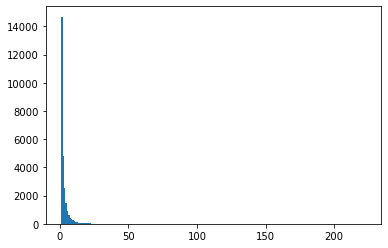

In [4]:
fo.plot_degree_dist(graph)

This is a "strange" graph but this is due to the high degrees of a very small number of nodes, for example: we have a node with degree of 224 and this makes plot "larger" to represent also this node, we could have decided not to represent it but we would have represented something that no longer corresponded to the original graph so we decided to not manipulate anything.

### Mie prove

In [20]:
cnt = 0
bet = []
mag = []
for el in graph.edges:
    if (el[1], el[0]) in graph.edges:
        bet.append(el)
    if graph.get_edge_data(el[0], el[1])['weight'] > 2:
        mag.append(el)
fin = list(set(bet).intersection(set(mag)))
print(fin[0])

(4946454, 3003438)


In [22]:
graph.get_edge_data(fin[0][0], fin[0][1])

{'weight': 4.0}

## Algorithmic question

In [20]:
def solve(n, l):
    # Vedere sotto sistemare
    d = [0] * n

    for el in l:
        f = el[0] - 1
        s = el[1] -1
        if f == s:
            return ("A kid can't fight with himself")
        if d[f] == 0 and d[s] == 0:
            d[f] = 1
            d[s] = 2
        elif d[f] == 0:
            if d[s] == 1:
                d[f] = 2
            else:
                d[f] = 1
        elif d[s] == 0:
            if d[f] == 1:
                d[s] = 2
            else:
                d[s] = 1
        elif d[f] == d[s]: # Se sono già stati assegnati non possono esser cambiati
            return False

    return True

n = 10    
pairs_no = [(1,3), (3,4), (1,4)]
pairs_yes = [(1,2), (3,4), (4,5), (5,8), (1,10)]
print(solve(n, pairs_no))
print(solve(n, pairs_yes))

False
True
True
